In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [306]:
#here, I am interested in the set of stochastic trajectories of a process
#the process is BRIGHT <-> OPEN <-> CLOSED. I am interested in the distribution of p(t_dark),
#where the OPEN and CLOSED configurations are dark. 

def get_t_wait(state = 0, k = [1,1,1,1]):
    #return the expected waiting time of the next event. K is the total rate constant
    if state == 0: #i.e. if closed
        K = k[1]
    elif state == 1: #i.e. if S1 open but not bound to imager
        K = k[0] + k[2]
    elif state == 2: #i.e. imager bound
        K = k[3]
    
    return 1/float(K) * np.log(1/np.random.rand()) 

def get_event(state = 0, k = [1,1,1,1]):
    #return the next state visited 
    if state == 0:
        return 1
    elif state == 1:
        p_val = [k[0], k[2]]
        p_val_normed = np.array(p_val) / np.sum(p_val)
        return np.random.choice([0,2], p = p_val_normed)
    elif state == 2:
        return 1
        
def get_trajectory(k, current_state, N): 
    t_jump = np.zeros(N,dtype=float)
    states = np.ones(N,dtype=float) * -1 

    for i in range(N):

        t_wait = get_t_wait(state = current_state, k = k)
        new_state = get_event(state = current_state, k = k)

        t_jump[i] = t_wait
        states[i] = new_state

        current_state = new_state
    
    t_val = np.cumsum(t_jump)
    
    return t_val, t_jump, states

In [307]:
def get_dark_time_distribution(k,N):

    t_val, t_jump, states = get_trajectory(k, 0, int(N))
    bright_index = np.where(states == 2)[0]
    dark_times_bounds = zip(bright_index[:-1],bright_index[1:])
    dark_times_vals = [np.sum(t_jump[i+1:j]) for i,j in dark_times_bounds]
    dark_times_vals.sort()
    
    return {'dark_times':dark_times_vals, 'p_vals' : np.linspace(0,1,len(dark_times_vals))}

In [ ]:
t_vals = [(1000.,1000.,2.,100.), (1e5,0.001,2.,100.), (100.,100.,2.,100.), (1000.,100.,2.,100.), (1000,10.,2.,100.), (10.,10.,2.,100.)]

#t_vals are just 1/k vals for each of the processes
#these processese are given by
#(S1 OPEN -> CLOSED, CLOSED -> S1 OPEN, S1 OPEN -> BOUND, BOUND -> S1 OPEN) 

cols = ['r','b','c','k','y']
res_dict = {}
N = 1e7
for t,c in zip(t_vals, cols):
    k = 1/np.array(t)
    res_dict[t] = get_dark_time_distribution(k, N)
    res_dict[t]['c'] = c


from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Times New Roman']})
rc('text', usetex=False)

f, ax = plt.subplots(1,1,figsize = (4,4))
for i in res_dict:
    sim = res_dict[i]
    plt.plot(sim['dark_times'], sim['p_vals'], color = sim['c'],label = i)
    print 'for the system where the k_vals are given by %s, the mean dark time is %s s'%(i, np.mean(sim['dark_times']))
f.patch.set_facecolor('white')
ax.set_xlim(0,300)

ax.set_xlabel('dark time (s)')
ax.set_ylabel('cumulative probabiltiy')

plt.legend()

(1000, 10.0, 100.0, 100.0) 110.13068377515344
(10.0, 10.0, 100.0, 100.0) 289.02657887389273


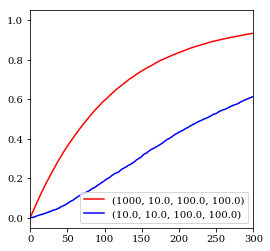

In [305]:

t_vals = [(1000,10.,100.,100.), (10.,10.,100.,100.)]

#t_vals are just 1/k vals for each of the processes
#these are the time values for each of the processes:
#(S2 OPEN -> CLOSED, CLOSED -> S1 OPEN, S1 OPEN -> BOUND, BOUND -> S1 OPEN) respectively

cols = ['r','b','c','k','y']
res_dict = {}
N = 1e7
for t,c in zip(t_vals, cols):
    k = 1/np.array(t)
    res_dict[t] = get_dark_time_distribution(k, N)
    res_dict[t]['c'] = c


from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Times New Roman']})
rc('text', usetex=False)

f, ax = plt.subplots(1,1,figsize = (4,4))


for i in res_dict:
    sim = res_dict[i]
    plt.plot(sim['dark_times'], sim['p_vals'], color = sim['c'],label = i)
    print i, np.mean(sim['dark_times'])
f.patch.set_facecolor('white')
ax.set_xlim(0,300)

plt.legend()